In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
facebook = pd.read_csv('pseudo_facebook.tsv', sep='\t')

In [3]:
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
facebook.shape

(99003, 15)

In [5]:
facebook.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

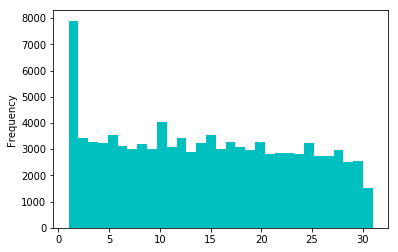

In [6]:
facebook.dob_day.plot(kind='hist', color='c', bins=31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1045b1dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1241f940>]], dtype=object)

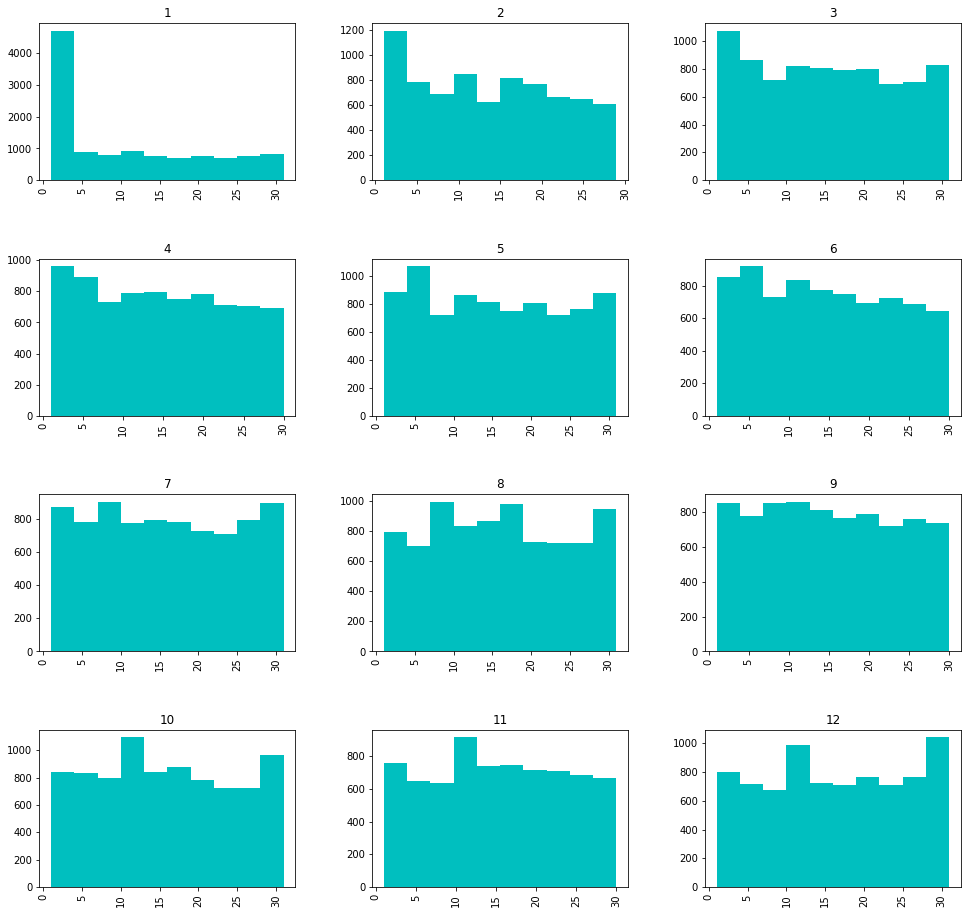

In [7]:
facebook.hist(column='dob_day',by='dob_month',layout=(4,3), figsize=(16,16),color='c')

In [8]:
bins= [i for i in range(1, 1000, 50)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0bdc6160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a0bde16d8>], dtype=object)

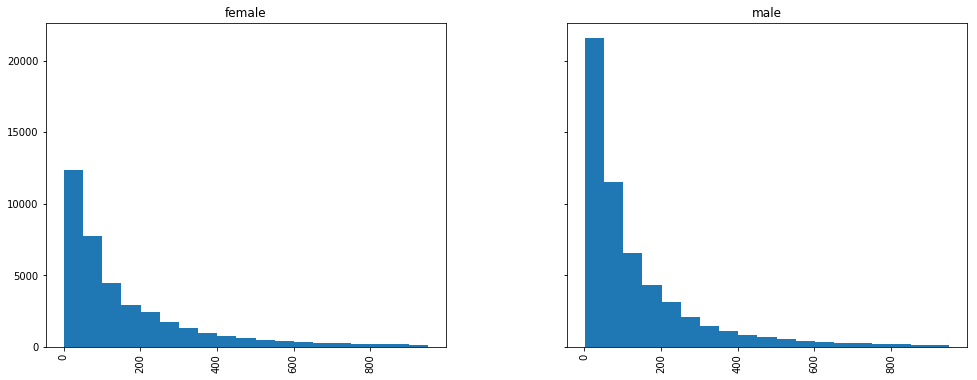

In [9]:
facebook.hist(column= 'friend_count', by='gender',range=(0,1000), bins=bins, rwidth=25, figsize=(16,6),sharey=True)

In [10]:
import numpy as np
np.log10(facebook.friend_count+1).describe()

count    99003.000000
mean         1.868052
std          0.665934
min          0.000000
25%          1.505150
50%          1.919078
75%          2.315970
max          3.692318
Name: friend_count, dtype: float64

Text(0.5,0,'the sqrt of number of friend_count')

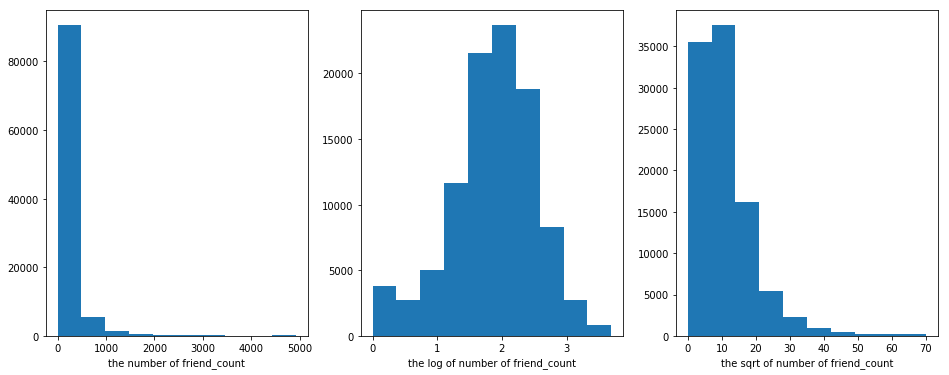

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))
ax1.hist(facebook.friend_count)
ax1.set_xlabel('the number of friend_count')
ax2.hist(np.log10(facebook.friend_count+1))
ax2.set_xlabel('the log of number of friend_count')
ax3.hist(np.sqrt(facebook.friend_count))
ax3.set_xlabel('the sqrt of number of friend_count')

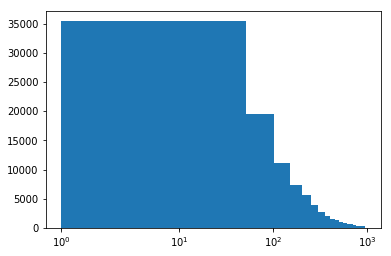

In [12]:
plt.hist(facebook.friend_count+1, bins)
plt.xscale('symlog')

In [13]:
np.sqrt(facebook.friend_count).describe()

count    99003.000000
mean        11.087630
std          8.568313
min          0.000000
25%          5.567764
50%          9.055385
75%         14.352700
max         70.164093
Name: friend_count, dtype: float64

In [14]:
facebook[['friend_count','gender']].groupby('gender').friend_count.median()

gender
female    96
male      74
Name: friend_count, dtype: int64

In [15]:
facebook[['friend_count','gender']].groupby('gender').friend_count.mean()

gender
female    241.969941
male      165.035459
Name: friend_count, dtype: float64

In [16]:
facebook.tenure.describe()

count    99001.000000
mean       537.887375
std        457.649874
min          0.000000
25%        226.000000
50%        412.000000
75%        675.000000
max       3139.000000
Name: tenure, dtype: float64

Text(0,0.5,'Number of users in sample')

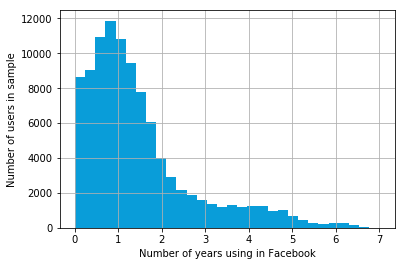

In [17]:
(facebook.tenure/365).hist(color='#099DD9', range=(0,7),bins=30)
plt.xlabel('Number of years using in Facebook')
plt.ylabel('Number of users in sample')

In [18]:
facebook.age.describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

([<matplotlib.axis.XTick at 0x1a16bcd358>,
 <a list of 23 Text xticklabel objects>)

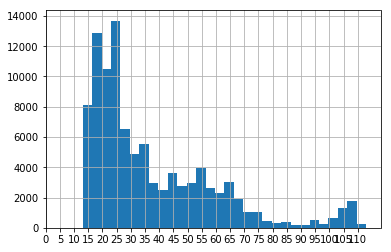

In [19]:
facebook.age.hist(bins=30, rwidth=1)
plt.xticks(range(0,113,5))

In [29]:
 facebook[facebook['gender'] =='male'].www_likes.sum(),  facebook[facebook['gender'] =='female'].www_likes.sum()

(1430175, 3507665)

In [30]:
facebook.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


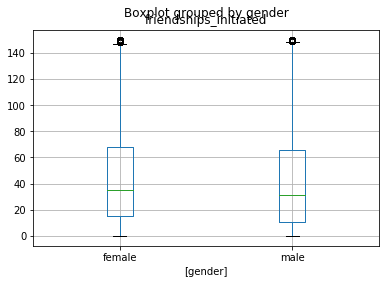

In [68]:
facebook[facebook['friendships_initiated']<=150][['friendships_initiated', 'gender']].boxplot(by='gender')

In [70]:
facebook['mobile_usage'] = np.where(facebook['mobile_likes']>0, 1, 0)

In [73]:
len(facebook[facebook['mobile_usage']>0])/len(facebook)

0.6459097199074776

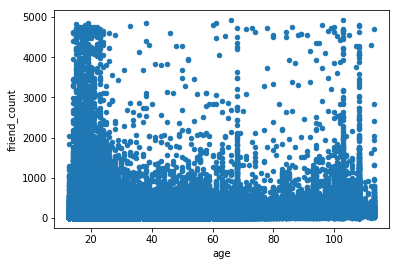

In [81]:
facebook.plot(x='age', y ='friend_count', kind='scatter')

In [83]:
facebook['age'].describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64